In [24]:
import pandas as pd
import numpy as np
import datetime as dt

In [50]:
df=pd.read_csv('data.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [4]:
df['Date'].value_counts()

2020-05-16    188
2020-04-28    188
2020-04-20    188
2020-02-01    188
2020-03-05    188
             ... 
2020-03-19    188
2020-04-23    188
2020-04-12    188
2020-03-08    188
2020-02-29    188
Name: Date, Length: 116, dtype: int64

In [6]:
dates=pd.to_datetime(df['Date'])
dates

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
21803   2020-05-16
21804   2020-05-16
21805   2020-05-16
21806   2020-05-16
21807   2020-05-16
Name: Date, Length: 21808, dtype: datetime64[ns]

In [7]:
df['Date']=dates
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [8]:
countries=df['Country'].unique()
countries[:5]

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
      dtype=object)

In [10]:
x=df[df['Country']=='Afghanistan']
x

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
188,2020-01-23,Afghanistan,0,0,0
376,2020-01-24,Afghanistan,0,0,0
564,2020-01-25,Afghanistan,0,0,0
752,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
20868,2020-05-12,Afghanistan,4963,610,127
21056,2020-05-13,Afghanistan,5226,648,132
21244,2020-05-14,Afghanistan,5639,691,136
21432,2020-05-15,Afghanistan,6053,745,153


In [11]:
import matplotlib.pyplot as plt

In [36]:
y=df[df['Country']=='India']

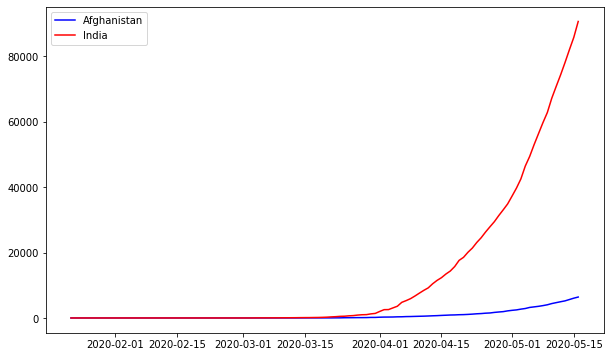

In [48]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot_date(x['Date'].values,x['Confirmed'].values,'b-')
plt.plot_date(y['Date'].values,y['Confirmed'].values,'b-',color='r')
plt.legend(labels=['Afghanistan','India'])

In [25]:
x['Date']=x['Date'].map(dt.datetime.toordinal)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
x

,Date,Country,Confirmed,Recovered,Deaths
0,737446,Afghanistan,0,0,0
188,737447,Afghanistan,0,0,0
376,737448,Afghanistan,0,0,0
564,737449,Afghanistan,0,0,0
752,737450,Afghanistan,0,0,0
...,...,...,...,...,...
20868,737557,Afghanistan,4963,610,127
21056,737558,Afghanistan,5226,648,132
21244,737559,Afghanistan,5639,691,136
21432,737560,Afghanistan,6053,745,153


In [31]:
from sklearn.model_selection import train_test_split

In [35]:
one=pd.get_dummies(df['Country'])
df[one.columns]=one
df.head()
df.drop()

,Date,Country,Confirmed,Recovered,Deaths,Afghanistan,Albania,Algeria,Andorra,Angola,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,Afghanistan,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# plots


In [51]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [53]:
us_data=df[df['Country']=='US']
us_data

,Date,Country,Confirmed,Recovered,Deaths
174,2020-01-22,US,1,0,0
362,2020-01-23,US,1,0,0
550,2020-01-24,US,2,0,0
738,2020-01-25,US,2,0,0
926,2020-01-26,US,5,0,0
...,...,...,...,...,...
21042,2020-05-12,US,1369376,230287,82356
21230,2020-05-13,US,1390406,243430,84119
21418,2020-05-14,US,1417774,246414,85898
21606,2020-05-15,US,1442824,250747,87530


In [55]:
us_data['Confirmed'].replace(0,np.nan)
us_data.dropna(axis=1,inplace=True)
us_data.shape

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(116, 5)

In [56]:
x=np.arange(1,117)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116])

In [60]:
us_data.drop('Date',axis=1,inplace=True)


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
us_data.set_index(x,inplace=True)
us_data

,Country,Confirmed,Recovered,Deaths
1,US,1,0,0
2,US,1,0,0
3,US,2,0,0
4,US,2,0,0
5,US,5,0,0
...,...,...,...,...
112,US,1369376,230287,82356
113,US,1390406,243430,84119
114,US,1417774,246414,85898
115,US,1442824,250747,87530


# India

In [68]:
ind_data=df[df['Country']=='India']
ind_data['Confirmed'].replace(0,np.nan,inplace=True)
ind_data.dropna(axis=0,inplace=True)
ind_data.shape

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(108, 5)

In [70]:
x=np.arange(1,109)
ind_data.drop('Date',axis=1,inplace=True)
ind_data.set_index(x,inplace=True)
ind_data

,Country,Confirmed,Recovered,Deaths
1,India,1.0,0,0
2,India,1.0,0,0
3,India,1.0,0,0
4,India,2.0,0,0
5,India,3.0,0,0
...,...,...,...,...
104,India,74292.0,24420,2415
105,India,78055.0,26400,2551
106,India,81997.0,27969,2649
107,India,85784.0,30258,2753


# spain

In [75]:
sp_data=df[df['Country']=='Spain']
sp_data['Confirmed'].replace(0,np.nan,inplace=True)
sp_data.dropna(axis=0,inplace=True)
sp_data.shape

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(106, 5)

In [76]:
x=np.arange(1,107)
sp_data.drop('Date',axis=1,inplace=True)
sp_data.set_index(x,inplace=True)
sp_data

,Country,Confirmed,Recovered,Deaths
1,Spain,1.0,0,0
2,Spain,1.0,0,0
3,Spain,1.0,0,0
4,Spain,1.0,0,0
5,Spain,1.0,0,0
...,...,...,...,...
102,Spain,228030.0,138980,26920
103,Spain,228691.0,140823,27104
104,Spain,229540.0,143374,27321
105,Spain,230183.0,144783,27459


# china

In [78]:
ch_data=df[df['Country']=='China']
ch_data['Confirmed'].replace(0,np.nan,inplace=True)
ch_data.dropna(axis=0,inplace=True)
ch_data.shape

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(116, 5)

In [79]:
x=np.arange(1,117)
ch_data.drop('Date',axis=1,inplace=True)
ch_data.set_index(x,inplace=True)
ch_data

,Country,Confirmed,Recovered,Deaths
1,China,548,28,17
2,China,643,30,18
3,China,920,36,26
4,China,1406,39,42
5,China,2075,49,56
...,...,...,...,...
112,China,84018,79222,4637
113,China,84024,79246,4637
114,China,84029,79261,4637
115,China,84038,79281,4637


# italy

In [83]:
it_data=df[df['Country']=='Italy']
it_data['Confirmed'].replace(0,np.nan,inplace=True)
it_data.dropna(axis=0,inplace=True)
it_data.shape

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(107, 5)

In [84]:
x=np.arange(1,108)
it_data.drop('Date',axis=1,inplace=True)
it_data.set_index(x,inplace=True)
it_data

,Country,Confirmed,Recovered,Deaths
1,Italy,2.0,0,0
2,Italy,2.0,0,0
3,Italy,2.0,0,0
4,Italy,2.0,0,0
5,Italy,2.0,0,0
...,...,...,...,...
103,Italy,221216.0,109039,30911
104,Italy,222104.0,112541,31106
105,Italy,223096.0,115288,31368
106,Italy,223885.0,120205,31610


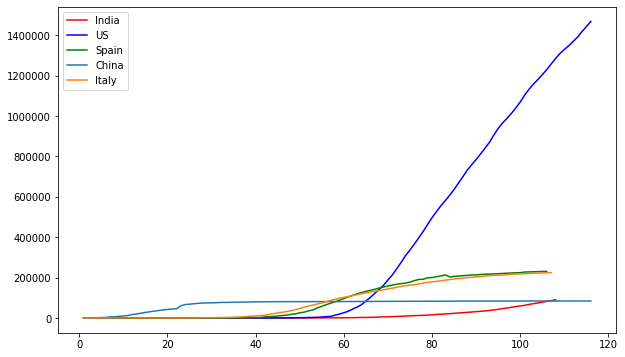

In [86]:
plt.plot(ind_data.index,ind_data['Confirmed'].values,color='r')
plt.plot(us_data.index,us_data['Confirmed'].values,color='b')
plt.plot(sp_data.index,sp_data['Confirmed'].values,color='g')
plt.plot(ch_data.index,ch_data['Confirmed'].values)
plt.plot(it_data.index,it_data['Confirmed'].values)
plt.legend(['India',"US","Spain","China","Italy"])

In [71]:
ind_data.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
             99, 100, 101, 102, 103, 104, 105, 106, 107, 108],
           dtype='int64', length=108)